In [1]:
import numpy as np
from config import Config
from reconstructor import Reconstructor
import matplotlib.pyplot as plt
import h5py

In [ ]:
c = Config('ConfigFiles/RealG15.yml')
r = Reconstructor(c)

# Read the (x,y) Coordinates and I9 confidence

In [9]:
with h5py.File(c.micFile,'r') as f:
    GrainIDMap = f["GrainID"][:].astype(int)
    grid_x = f["Xcoordinate"][:]
    grid_y = f["Ycoordinate"][:]
    grid_c = f["Convidence"][:]

mask = np.where(GrainIDMap==c.grainID)
x = grid_x[mask]
y = grid_y[mask]
con = grid_c[mask]

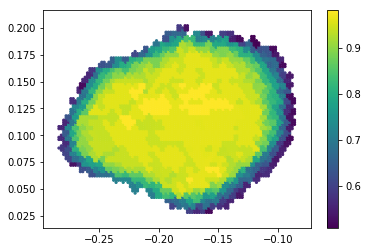

6233


In [10]:
threshold=0.5

fig, ax = plt.subplots()
cax=ax.scatter(x[con>threshold],y[con>threshold],c=con[con>threshold],s=5)
cbar = fig.colorbar(cax)

plt.show()

tmpx=x[con>threshold]
tmpy=y[con>threshold]

print(len(x[con>threshold]))

# Reconstruct strain tensor

In [11]:
Phase1_Conf, Phase1_S = r.ReconGridsPhase1(tmpx,tmpy)

0 [[ 9.65608534e-10  3.52389119e-10  2.92141260e-11  4.97903044e-12
   7.24777633e-10 -2.38586001e-11 -1.04006026e-10 -1.26802653e-10
   1.78323055e-10]
 [ 3.52389119e-10  5.07008096e-10 -6.98871820e-11  4.77830692e-11
   1.30216207e-10 -1.23038749e-11 -6.44973282e-11  1.29038057e-10
   3.65039037e-11]
 [ 2.92141260e-11 -6.98871820e-11  8.12738817e-11 -1.85297264e-11
   3.59095009e-12 -1.55727294e-12 -4.90978669e-12 -1.73752927e-10
   7.49151852e-11]
 [ 4.97903044e-12  4.77830692e-11 -1.85297264e-11  4.69516168e-11
   3.27811549e-11 -1.45613605e-11  4.13088224e-11  6.96575270e-11
  -6.52642136e-11]
 [ 7.24777633e-10  1.30216207e-10  3.59095009e-12  3.27811549e-11
   7.77837488e-10 -3.47359174e-11 -6.15028853e-11  1.59505857e-10
   4.39665850e-11]
 [-2.38586001e-11 -1.23038749e-11 -1.55727294e-12 -1.45613605e-11
  -3.47359174e-11  4.81729738e-11 -5.03985562e-11 -2.67434364e-11
   8.94559520e-11]
 [-1.04006026e-10 -6.44973282e-11 -4.90978669e-12  4.13088224e-11
  -6.15028853e-11 -5.03985

350 [[ 1.46738884e-09 -6.13941857e-11  5.25677344e-11  3.29187279e-11
   1.35580865e-09 -1.43252626e-10  4.30125362e-10 -2.60792122e-10
   2.27426669e-10]
 [-6.13941857e-11  1.82181605e-10 -2.10957794e-11  6.26519876e-11
   1.18191638e-11  2.65502589e-11 -1.16619654e-10  1.11361603e-10
  -9.45575829e-13]
 [ 5.25677344e-11 -2.10957794e-11  2.16299675e-11 -7.24143043e-13
   6.61405260e-11 -3.31491478e-12  4.48046955e-11 -2.99514860e-13
   1.16087884e-11]
 [ 3.29187279e-11  6.26519876e-11 -7.24143043e-13  1.44045264e-10
   8.38729922e-11  2.28831117e-11  2.61441929e-10 -1.32922243e-11
   6.64802482e-11]
 [ 1.35580865e-09  1.18191638e-11  6.61405260e-11  8.38729922e-11
   1.56982026e-09 -1.42382024e-10  3.74394831e-10  2.67267684e-10
   1.46123390e-10]
 [-1.43252626e-10  2.65502589e-11 -3.31491478e-12  2.28831117e-11
  -1.42382024e-10  5.35683820e-11 -8.03355551e-12 -7.28466298e-11
   5.43683147e-11]
 [ 4.30125362e-10 -1.16619654e-10  4.48046955e-11  2.61441929e-10
   3.74394831e-10 -8.033

700 [[ 9.13202876e-10  2.44518670e-11 -1.18251164e-11 -3.73739634e-11
   1.00199336e-09 -1.27657866e-10 -1.79129391e-11  1.87647087e-10
   8.71587537e-11]
 [ 2.44518670e-11  5.73820204e-11 -5.67222814e-12  5.83546441e-12
  -1.78369800e-11 -5.24947635e-12 -2.49343744e-11 -1.78641202e-10
   7.30983201e-12]
 [-1.18251164e-11 -5.67222814e-12  2.51465964e-11  5.88629957e-13
  -5.01275343e-11  1.68671268e-12  2.15988339e-11 -2.18172298e-11
  -2.83400082e-11]
 [-3.73739634e-11  5.83546441e-12  5.88629957e-13  1.77604599e-10
   7.93256053e-12  1.00523249e-11  1.75170952e-10  3.35275539e-11
  -3.55144873e-11]
 [ 1.00199336e-09 -1.78369800e-11 -5.01275343e-11  7.93256053e-12
   1.56947070e-09 -1.64456356e-10  3.21824431e-11  8.69938066e-10
   1.62040150e-10]
 [-1.27657866e-10 -5.24947635e-12  1.68671268e-12  1.00523249e-11
  -1.64456356e-10  9.07078043e-11 -3.32296485e-11 -9.20614781e-12
   1.04613173e-10]
 [-1.79129391e-11 -2.49343744e-11  2.15988339e-11  1.75170952e-10
   3.21824431e-11 -3.322

1050 [[ 5.98186418e-10  1.07489861e-10 -7.16051541e-11 -6.22180522e-12
   3.59481333e-10  2.17978680e-12 -2.24126886e-11  8.72449271e-12
   9.41038725e-11]
 [ 1.07489861e-10  3.04992377e-10 -1.30472632e-10  9.27435843e-11
  -8.63450050e-11  7.59311061e-11 -1.86805363e-11  2.42566718e-10
  -4.54302436e-11]
 [-7.16051541e-11 -1.30472632e-10  6.99643400e-11 -4.03482894e-11
   4.17224289e-11 -3.49028544e-11 -6.04802275e-12 -8.49287950e-11
   2.48168425e-11]
 [-6.22180522e-12  9.27435843e-11 -4.03482894e-11  1.09159018e-10
  -1.04748913e-10  4.32885150e-11  7.14231625e-11  4.27430480e-11
  -2.84395053e-11]
 [ 3.59481333e-10 -8.63450050e-11  4.17224289e-11 -1.04748913e-10
   6.33578649e-10 -1.22593595e-10 -6.05113949e-11  5.35954085e-11
   5.41530769e-11]
 [ 2.17978680e-12  7.59311061e-11 -3.49028544e-11  4.32885150e-11
  -1.22593595e-10  5.66659020e-11 -2.11495903e-11 -6.15135251e-12
   1.87379225e-11]
 [-2.24126886e-11 -1.86805363e-11 -6.04802275e-12  7.14231625e-11
  -6.05113949e-11 -2.11

1400 [[ 1.00305921e-09  7.83076772e-11  3.55695559e-11  5.62244818e-11
   3.89173434e-10  3.06265668e-11  2.65791005e-10 -6.45289708e-10
   3.02158326e-10]
 [ 7.83076772e-11  1.15589261e-10  1.71780194e-11 -2.76093437e-11
   3.39227232e-11 -1.07129871e-11 -1.56069016e-10 -3.39326093e-12
  -2.38316518e-11]
 [ 3.55695559e-11  1.71780194e-11  3.63189016e-11  4.15801152e-11
   2.04289310e-11  1.08694003e-11  1.56492702e-10 -4.53525543e-11
   5.24512534e-11]
 [ 5.62244818e-11 -2.76093437e-11  4.15801152e-11  3.56976549e-10
   1.08465675e-10  5.45809667e-11  9.26382358e-10 -8.98050290e-11
   1.63987797e-10]
 [ 3.89173434e-10  3.39227232e-11  2.04289310e-11  1.08465675e-10
   7.53785385e-10 -4.78455525e-11  2.71751571e-10  4.28791815e-10
   4.20821782e-11]
 [ 3.06265668e-11 -1.07129871e-11  1.08694003e-11  5.45809667e-11
  -4.78455525e-11  4.57189723e-11  1.60003161e-10 -9.53427634e-11
   1.13234791e-10]
 [ 2.65791005e-10 -1.56069016e-10  1.56492702e-10  9.26382358e-10
   2.71751571e-10  1.60

1750 [[ 1.03688116e-09  7.14905095e-11  4.71522033e-11 -9.40186831e-11
   7.30913101e-10  6.04877733e-11 -2.86226585e-10 -6.10802759e-10
   6.23086765e-10]
 [ 7.14905095e-11  1.83783000e-10 -6.49608708e-11 -2.23410035e-11
  -8.27954231e-11  6.43073134e-11 -2.30139995e-10 -1.24566817e-10
   9.40844379e-11]
 [ 4.71522033e-11 -6.49608708e-11  6.88689107e-11  7.15863193e-12
   2.45718414e-11 -3.15900880e-11  1.82241444e-10 -3.75100083e-13
   1.18275861e-11]
 [-9.40186831e-11 -2.23410035e-11  7.15863193e-12  1.21522591e-10
  -1.33970283e-11 -1.53854679e-11  3.13689627e-10  6.98968746e-11
  -6.55936639e-11]
 [ 7.30913101e-10 -8.27954231e-11  2.45718414e-11 -1.33970283e-11
   9.47503020e-10 -3.84610134e-11 -4.06239806e-10  6.49504033e-11
   2.36104854e-10]
 [ 6.04877733e-11  6.43073134e-11 -3.15900880e-11 -1.53854679e-11
  -3.84610134e-11  7.08835179e-11 -1.80630298e-10 -2.23746194e-10
   1.70162799e-10]
 [-2.86226585e-10 -2.30139995e-10  1.82241444e-10  3.13689627e-10
  -4.06239806e-10 -1.80

2100 [[ 5.39417911e-10 -4.90946526e-11 -2.11837621e-11  5.13034082e-11
   3.25754254e-10 -4.45586049e-12  2.06013445e-10 -2.93310526e-10
   1.17343628e-10]
 [-4.90946526e-11  4.64454187e-11  1.10966263e-11  1.33971166e-11
   8.20500761e-12 -6.68041151e-12 -1.52348312e-12  8.42637727e-12
  -1.45616849e-11]
 [-2.11837621e-11  1.10966263e-11  1.58380799e-11  7.78692209e-12
  -1.18165623e-11  2.47073008e-13  3.97250367e-11  1.86586886e-11
  -1.03750406e-11]
 [ 5.13034082e-11  1.33971166e-11  7.78692209e-12  1.31788158e-10
   2.44978302e-11 -1.09352967e-11  3.44363552e-10 -1.05977517e-10
   1.58851953e-11]
 [ 3.25754254e-10  8.20500761e-12 -1.18165623e-11  2.44978302e-11
   3.90802703e-10 -9.87156764e-12  7.84516043e-11  1.66285442e-11
   3.70475400e-11]
 [-4.45586049e-12 -6.68041151e-12  2.47073008e-13 -1.09352967e-11
  -9.87156764e-12  3.92992896e-11  7.72977742e-11 -5.16257026e-11
   3.91621194e-11]
 [ 2.06013445e-10 -1.52348312e-12  3.97250367e-11  3.44363552e-10
   7.84516043e-11  7.72

2450 [[ 1.78933057e-09  5.81172038e-11  7.55229298e-12 -5.31690786e-11
   1.25177084e-09 -1.02110204e-10 -1.03768938e-10 -9.20487418e-10
   5.56712010e-10]
 [ 5.81172038e-11  1.80790225e-10 -1.53008146e-12 -2.34553746e-11
   2.59490891e-11  3.54699845e-11 -3.77863525e-10 -8.29120465e-11
   1.49158792e-10]
 [ 7.55229298e-12 -1.53008146e-12  1.64551645e-11  8.23815925e-12
   1.87125661e-11 -2.19320042e-11  7.21833952e-11  3.88790998e-11
  -1.37855895e-11]
 [-5.31690786e-11 -2.34553746e-11  8.23815925e-12  2.68187769e-10
   4.73454982e-11 -5.93688972e-11  5.92191198e-10  1.09198629e-10
  -1.21055803e-10]
 [ 1.25177084e-09  2.59490891e-11  1.87125661e-11  4.73454982e-11
   1.40439356e-09 -1.91436740e-10  1.11558764e-10 -1.28021292e-10
   2.40622752e-10]
 [-1.02110204e-10  3.54699845e-11 -2.19320042e-11 -5.93688972e-11
  -1.91436740e-10  1.27233101e-10 -2.78730580e-10 -8.49201460e-11
   1.17753785e-10]
 [-1.03768938e-10 -3.77863525e-10  7.21833952e-11  5.92191198e-10
   1.11558764e-10 -2.78

2800 [[ 7.78501145e-10 -2.05306917e-10 -1.12296247e-11  1.19953897e-10
   4.22235192e-10  2.92451603e-11  6.89739245e-10 -5.97649548e-10
   2.08333622e-10]
 [-2.05306917e-10  1.21996174e-10  8.69771340e-14 -4.62212917e-11
  -7.71252749e-11 -3.13885268e-12 -3.09270452e-10  2.95574718e-10
  -4.22485568e-11]
 [-1.12296247e-11  8.69771340e-14  3.35022341e-11  1.10010336e-11
   2.22933115e-11  1.42098097e-11  9.87817615e-11  3.88442462e-11
   4.82793044e-11]
 [ 1.19953897e-10 -4.62212917e-11  1.10010336e-11  8.33819168e-11
  -1.67628086e-11  6.48215846e-12  3.83085198e-10 -1.82348643e-10
   2.49758241e-11]
 [ 4.22235192e-10 -7.71252749e-11  2.22933115e-11 -1.67628086e-11
   5.92899200e-10  2.18469456e-11  2.30395506e-10  2.23830233e-10
   1.85093186e-10]
 [ 2.92451603e-11 -3.13885268e-12  1.42098097e-11  6.48215846e-12
   2.18469456e-11  2.05388264e-11  2.96440675e-11  3.24748408e-11
   6.47637281e-11]
 [ 6.89739245e-10 -3.09270452e-10  9.87817615e-11  3.83085198e-10
   2.30395506e-10  2.96

3150 [[ 6.46339151e-10 -3.16911417e-11  4.99082434e-11 -2.46951443e-11
   7.13278168e-10  1.83139946e-13  9.45778729e-11  2.62962136e-10
   1.92337927e-10]
 [-3.16911417e-11  2.09538392e-11 -5.88351104e-12  9.96562430e-12
  -2.48225896e-11  9.76257421e-13 -1.00888625e-11  1.41585166e-11
   3.96713778e-12]
 [ 4.99082434e-11 -5.88351104e-12  1.06986761e-11 -6.97878268e-12
   5.27337264e-11  1.58442807e-12  1.34266192e-11  2.95520180e-11
   1.35414915e-11]
 [-2.46951443e-11  9.96562430e-12 -6.97878268e-12  3.68359401e-11
  -2.56791686e-11 -8.45325471e-12  1.44465943e-11  1.13020872e-12
  -3.36740283e-12]
 [ 7.13278168e-10 -2.48225896e-11  5.27337264e-11 -2.56791686e-11
   1.04483332e-09  4.18940057e-12  1.46215956e-10  5.20729299e-10
   2.72995325e-10]
 [ 1.83139946e-13  9.76257421e-13  1.58442807e-12 -8.45325471e-12
   4.18940057e-12  8.96465439e-12  7.75320987e-12  1.14523154e-11
   1.12176990e-11]
 [ 9.45778729e-11 -1.00888625e-11  1.34266192e-11  1.44465943e-11
   1.46215956e-10  7.75

3500 [[ 1.97773534e-09 -3.57324315e-10  4.12285901e-11 -2.06603332e-11
   1.55013575e-09 -1.21412356e-10  6.36811053e-10 -1.46750710e-09
   6.35112570e-10]
 [-3.57324315e-10  1.83467082e-10 -3.93512417e-11  2.13350709e-11
  -3.03254046e-10  2.56226925e-11 -1.17126080e-10  4.57839215e-10
  -1.36600408e-10]
 [ 4.12285901e-11 -3.93512417e-11  5.74053947e-11 -3.37597963e-12
   7.77259650e-11 -4.09463443e-12  2.01838538e-10 -1.26162493e-11
   8.94029659e-11]
 [-2.06603332e-11  2.13350709e-11 -3.37597963e-12  4.50539386e-11
  -7.56142855e-11  1.35677518e-12  1.01160265e-10  3.23841972e-11
  -2.57279974e-11]
 [ 1.55013575e-09 -3.03254046e-10  7.77259650e-11 -7.56142855e-11
   1.68216501e-09 -8.10683835e-11  4.64604440e-10 -9.71026624e-10
   6.51339162e-10]
 [-1.21412356e-10  2.56226925e-11 -4.09463443e-12  1.35677518e-12
  -8.10683835e-11  4.37397884e-11 -9.72525072e-11  1.02682522e-10
   1.30281938e-11]
 [ 6.36811053e-10 -1.17126080e-10  2.01838538e-10  1.01160265e-10
   4.64604440e-10 -9.72

3850 [[ 6.73089544e-10 -9.92359138e-11  1.72209985e-11  5.05584880e-11
   4.93367121e-10 -3.26213793e-11  3.31699377e-10 -2.73852147e-10
   1.65980492e-10]
 [-9.92359138e-11  2.47189371e-10  2.48960642e-11 -1.77177701e-11
   1.53843322e-10  2.51488882e-11 -3.89572205e-11  1.97307267e-10
   5.23893788e-11]
 [ 1.72209985e-11  2.48960642e-11  2.11615969e-11  7.86473358e-12
   8.06135910e-11  7.49794390e-12  7.26797276e-11  4.41974695e-11
   3.96203082e-11]
 [ 5.05584880e-11 -1.77177701e-11  7.86473358e-12  3.81520407e-11
   2.97617248e-11 -1.73484607e-12  1.53383869e-10 -3.40409503e-11
   2.33585904e-11]
 [ 4.93367121e-10  1.53843322e-10  8.06135910e-11  2.97617248e-11
   1.03291297e-09  2.18549314e-11  3.55301865e-10  2.97590243e-10
   2.80905127e-10]
 [-3.26213793e-11  2.51488882e-11  7.49794390e-12 -1.73484607e-12
   2.18549314e-11  1.71455948e-11  3.98305175e-12  3.63116499e-11
   3.12461862e-11]
 [ 3.31699377e-10 -3.89572205e-11  7.26797276e-11  1.53383869e-10
   3.55301865e-10  3.98

4200 [[ 4.17638873e-10  1.09725160e-10  3.59036236e-11  4.06352363e-11
   5.68852149e-11  3.59742169e-11  2.55102060e-10 -4.91544054e-10
   1.68143558e-10]
 [ 1.09725160e-10  2.74503583e-10 -5.40077493e-11 -7.73423601e-11
  -6.91309252e-11  3.14050534e-11 -3.91071351e-10  6.85780664e-11
   6.64025838e-11]
 [ 3.59036236e-11 -5.40077493e-11  5.48663568e-11  6.23981393e-11
   2.29547627e-11  3.18438342e-12  3.01700317e-10 -1.92530654e-10
   3.46015259e-11]
 [ 4.06352363e-11 -7.73423601e-11  6.23981393e-11  2.30972129e-10
   1.04776316e-10  1.39562288e-11  8.21585617e-10 -3.48821524e-10
   8.30285228e-11]
 [ 5.68852149e-11 -6.91309252e-11  2.29547627e-11  1.04776316e-10
   3.62136363e-10 -1.16337132e-11  3.00920214e-10  2.56983800e-10
   6.62550319e-11]
 [ 3.59742169e-11  3.14050534e-11  3.18438342e-12  1.39562288e-11
  -1.16337132e-11  3.77855772e-11  3.91251100e-11 -9.79020298e-11
   1.23746207e-10]
 [ 2.55102060e-10 -3.91071351e-10  3.01700317e-10  8.21585617e-10
   3.00920214e-10  3.91

4550 [[ 6.30593940e-10  7.78506907e-11 -8.53604940e-11  4.86137519e-11
   6.87499488e-10  7.30507273e-11 -1.85769866e-10 -1.03971603e-10
   1.97344922e-10]
 [ 7.78506907e-11  2.09588186e-10 -5.70304079e-12  6.27536799e-11
   1.56621851e-10  2.55090813e-11 -1.35119220e-10 -7.40316783e-12
   4.89821693e-11]
 [-8.53604940e-11 -5.70304079e-12  3.52466600e-11 -8.86893959e-12
  -9.63713301e-11 -1.38092904e-11  6.85916864e-11  1.82621858e-11
  -1.91068764e-11]
 [ 4.86137519e-11  6.27536799e-11 -8.86893959e-12  1.25383067e-10
  -3.30046883e-11  9.17271765e-12  2.44260330e-11 -5.18948678e-11
  -8.32016243e-13]
 [ 6.87499488e-10  1.56621851e-10 -9.63713301e-11 -3.30046883e-11
   1.19363201e-09  1.19904464e-10 -3.35434494e-10  3.08566076e-11
   2.70137313e-10]
 [ 7.30507273e-11  2.55090813e-11 -1.38092904e-11  9.17271765e-12
   1.19904464e-10  6.87725951e-11 -9.44623764e-11 -7.03799456e-12
   8.55408948e-11]
 [-1.85769866e-10 -1.35119220e-10  6.85916864e-11  2.44260330e-11
  -3.35434494e-10 -9.44

4900 [[ 1.33412094e-09 -1.49057182e-10 -4.57941554e-11  1.89798188e-10
   8.27721772e-10 -7.82663317e-11  6.83817600e-10 -1.11794172e-09
   1.45718222e-10]
 [-1.49057182e-10  6.11345550e-10  1.72153686e-10  4.13428311e-11
  -3.51032840e-10  2.02794031e-10  1.22203361e-10  6.66133054e-10
   4.67573244e-10]
 [-4.57941554e-11  1.72153686e-10  6.31108705e-11  3.04842754e-11
  -8.50521542e-11  4.85927161e-11  1.16435106e-10  2.22018994e-10
   1.18685292e-10]
 [ 1.89798188e-10  4.13428311e-11  3.04842754e-11  1.75152929e-10
   3.89643652e-11  1.15026958e-11  5.09653854e-10 -1.77853045e-10
   6.53595216e-11]
 [ 8.27721772e-10 -3.51032840e-10 -8.50521542e-11  3.89643652e-11
   1.12226325e-09 -1.88535122e-10  2.02620857e-10 -6.25817907e-10
  -1.88112876e-10]
 [-7.82663317e-11  2.02794031e-10  4.85927161e-11  1.15026958e-11
  -1.88535122e-10  1.28224173e-10 -1.40315437e-11  3.30328011e-10
   2.66041687e-10]
 [ 6.83817600e-10  1.22203361e-10  1.16435106e-10  5.09653854e-10
   2.02620857e-10 -1.40

5250 [[ 1.21116356e-09 -5.57906246e-10 -9.64109605e-11  1.86193777e-10
   2.10481734e-09 -2.77447027e-10 -6.64678269e-11  7.76031962e-11
  -1.52105809e-11]
 [-5.57906246e-10  4.23624799e-10  8.90874300e-11 -1.50270577e-10
  -1.29970015e-09  1.55287674e-10  6.74821069e-11 -1.07409713e-10
   6.19474254e-11]
 [-9.64109605e-11  8.90874300e-11  3.24190162e-11 -4.85034994e-11
  -2.59135646e-10  1.64710671e-11  1.84922174e-11 -1.46259413e-12
  -7.58375549e-12]
 [ 1.86193777e-10 -1.50270577e-10 -4.85034994e-11  1.40573039e-10
   5.02363102e-10 -2.47945164e-11  2.86060929e-11  3.22979472e-12
   8.93074535e-12]
 [ 2.10481734e-09 -1.29970015e-09 -2.59135646e-10  5.02363102e-10
   4.45048887e-09 -5.30488105e-10 -1.78969834e-10  3.12463005e-10
  -1.43528035e-10]
 [-2.77447027e-10  1.55287674e-10  1.64710671e-11 -2.47945164e-11
  -5.30488105e-10  1.00502339e-10  3.08016357e-11 -6.10824500e-11
   6.00010918e-11]
 [-6.64678269e-11  6.74821069e-11  1.84922174e-11  2.86060929e-11
  -1.78969834e-10  3.08

5600 [[ 3.31393817e-10 -6.02733938e-11  3.63202536e-11  7.02738559e-11
   1.93530907e-10  3.13183954e-11  3.45293960e-10 -3.04321362e-10
   2.13092461e-10]
 [-6.02733938e-11  5.67005330e-11 -1.37970777e-11  1.68075091e-11
  -2.74587793e-11  1.23413119e-12 -7.88412605e-11  1.15759029e-10
  -2.28205792e-11]
 [ 3.63202536e-11 -1.37970777e-11  2.02358366e-11  4.87444495e-11
   4.14200238e-12  1.67404028e-11  2.22341015e-10 -4.24624859e-11
   6.94100751e-11]
 [ 7.02738559e-11  1.68075091e-11  4.87444495e-11  3.46674080e-10
  -9.22242281e-11  1.04574265e-10  1.04063917e-09 -1.67124949e-10
   3.46146799e-10]
 [ 1.93530907e-10 -2.74587793e-11  4.14200238e-12 -9.22242281e-11
   3.73111145e-10 -8.30464056e-11 -1.72810592e-10  2.21261626e-10
  -1.34741765e-10]
 [ 3.13183954e-11  1.23413119e-12  1.67404028e-11  1.04574265e-10
  -8.30464056e-11  7.24038228e-11  3.39237490e-10 -1.80470895e-10
   1.85986247e-10]
 [ 3.45293960e-10 -7.88412605e-11  2.22341015e-10  1.04063917e-09
  -1.72810592e-10  3.39

5950 [[ 8.46782417e-10 -1.97606699e-10 -1.33641993e-11  1.78410088e-10
   3.02969829e-10  1.64001363e-11  5.45059101e-10 -8.13209113e-10
   3.92571017e-10]
 [-1.97606699e-10  1.24047771e-10 -2.57154313e-11 -1.85428522e-11
  -6.29519892e-11 -1.11565127e-11 -3.79064491e-10  2.15956478e-10
  -6.66361284e-11]
 [-1.33641993e-11 -2.57154313e-11  1.95136599e-11 -2.68442927e-11
   1.55778307e-11  1.84686780e-12  9.24832967e-11  3.24464172e-11
  -2.63033196e-11]
 [ 1.78410088e-10 -1.85428522e-11 -2.68442927e-11  2.97429984e-10
  -1.52010334e-10  2.31388659e-11  5.87957652e-10 -5.22381584e-10
   1.78655029e-10]
 [ 3.02969829e-10 -6.29519892e-11  1.55778307e-11 -1.52010334e-10
   5.19312887e-10 -7.74269692e-11 -3.00549355e-10  3.68815335e-10
  -8.85543591e-11]
 [ 1.64001363e-11 -1.11565127e-11  1.84686780e-12  2.31388659e-11
  -7.74269692e-11  3.22149161e-11  1.09496843e-10 -1.65455048e-10
   7.29953832e-11]
 [ 5.45059101e-10 -3.79064491e-10  9.24832967e-11  5.87957652e-10
  -3.00549355e-10  1.09

In [12]:
r.SimPhase1Result(tmpx,tmpy,Phase1_S)

tmpS=Phase1_S.copy()

Phase2_S, history = r.ReconGridsPhase2(tmpx,tmpy,tmpS,fidelity='KL')

1/10, loss=0
2/10, loss=-155468.81983947754
3/10, loss=-224668.5359826088
4/10, loss=-257400.00188469887
5/10, loss=-274752.67014861107
6/10, loss=-286315.1561758518
7/10, loss=-293389.71156829596
8/10, loss=-299820.4308642745
9/10, loss=-304353.4521690011
10/10, loss=-307165.04608231783


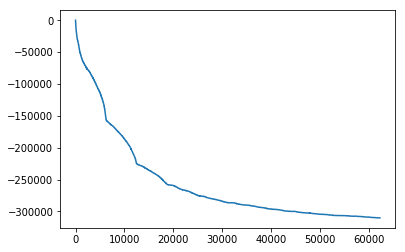

In [13]:
plt.plot(history)
plt.show()

In [16]:
# change the nominal lattice parameters if it's needed 
# when you think you used the wrong lattice parameter in the configure file, you can
# modify the results like here without rerun the reconstruction
MLatticeParam=np.diag([2.92539/2.95, 2.92539/2.95, 4.67399/4.7152])
Phase2_S_corrected = np.einsum('ijk,kl->ijl',Phase2_S,MLatticeParam)

In [17]:
realO,realS = r.Transform2RealS(Phase2_S_corrected)

with h5py.File(c.recFile, 'w') as f:
    f.create_dataset("x", data=tmpx)
    f.create_dataset("y", data=tmpy)

    f.create_dataset("Phase1_Conf", data=Phase1_Conf)
    f.create_dataset("Phase1_S", data=Phase1_S)

    f.create_dataset("Phase2_S", data=Phase2_S)

    f.create_dataset('Phase2_history', data=history)

    f.create_dataset("realS", data=realS)
    f.create_dataset("realO", data=realO)


# Visualizing the reconstruction results

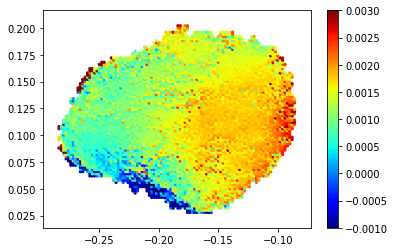

In [18]:
comp=[2,2]
fig, ax = plt.subplots()
cax=ax.scatter(tmpx,tmpy,c=realS[:,comp[0],comp[1]]-1,
               s=5,cmap='jet',
#                vmin=-0.0097,vmax=-0.0059
               vmin=-0.001,vmax=0.003
              )
cbar = fig.colorbar(cax)
# fig.savefig('Szz_1.png',format='png',dpi=300)
plt.show()

In [19]:
# simulate the diffraction pattern from the reconstruction result
simulatedMaps=r.recon.simMap(tmpx,tmpy,Phase2_S,blur=False,dtype=np.uint32)

In [22]:
np.where(r.peakFile['Imgs']['Im75'][:]==np.max(r.peakFile['Imgs']['Im75'][:]))

(array([36, 36, 37, 37, 46, 46, 47, 58]),
 array([180, 181, 180, 181, 204, 205, 204, 185]),
 array([22, 22, 22, 22, 22, 22, 22, 22]))

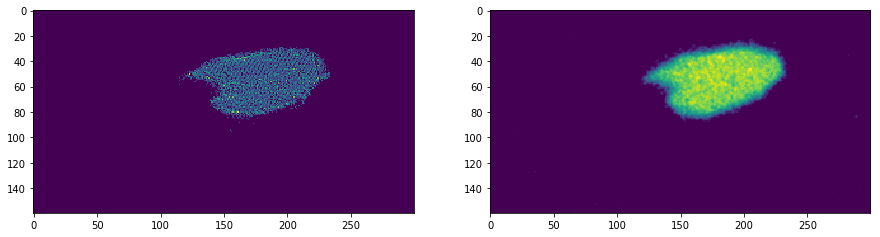

In [23]:
# compare the simulated pattern with the real pattern
ii=75
offset=22
fig,axs=plt.subplots(1,2,figsize=(15,8))
axs[0].imshow(simulatedMaps[:,:,45*ii+offset])
axs[1].imshow(r.peakFile['Imgs']['Im{0:d}'.format(ii)][:,:,offset])
plt.show()